In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 21.8MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.3MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,BatchNormalization,Dropout


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [51]:

model = Sequential()

model.add(Conv2D(10,kernel_size=(3,3),padding ='valid',activation= 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding= 'valid'))

model.add(Conv2D(20,kernel_size=(3,3),padding ='valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding= 'valid'))

model.add(Conv2D(40,kernel_size=(3,3),padding ='valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding= 'valid'))

model.add(Conv2D(80,kernel_size=(3,3),padding ='valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding= 'valid'))

model.add(Flatten())

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer ='Adam',loss='binary_crossentropy',metrics = 'accuracy')



In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 batch_normalization_9 (Batc  (None, 254, 254, 10)     40        
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 20)      1820      
                                                                 
 batch_normalization_10 (Bat  (None, 125, 125, 20)     80        
 chNormalization)                                                
                                                      

In [53]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 84s 123ms/step - loss: 0.6537 - accuracy: 0.6284 - val_loss: 0.5447 - val_accuracy: 0.7254
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.5108 - accuracy: 0.7469 - val_loss: 0.6982 - val_accuracy: 0.6666
Epoch 3/10
625/625 [==============================] - 53s 84ms/step - loss: 0.4329 - accuracy: 0.7991 - val_loss: 0.4359 - val_accuracy: 0.7982
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3616 - accuracy: 0.8396 - val_loss: 0.4408 - val_accuracy: 0.7888
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2913 - accuracy: 0.8750 - val_loss: 0.6219 - val_accuracy: 0.7468
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2260 - accuracy: 0.9090 - val_loss: 0.3522 - val_accuracy: 0.8630
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1793 - accuracy: 0.9282 - val_loss: 0.4931 - val_accuracy

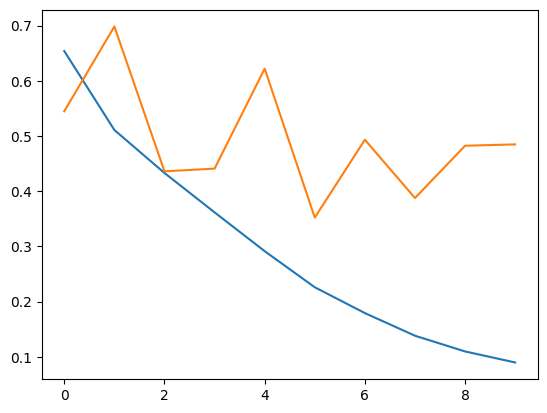

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

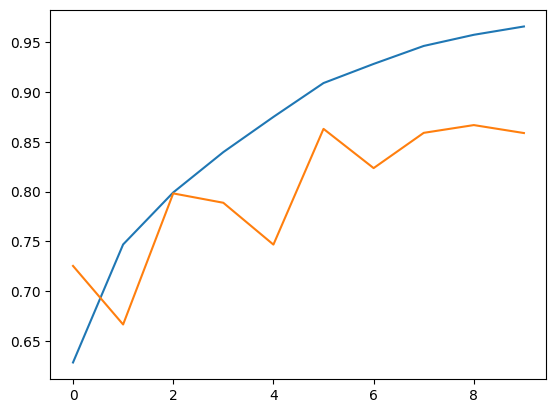

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
import cv2
import matplotlib.pyplot as plt

In [37]:
img = cv2.imread('/content/cat.jpeg')

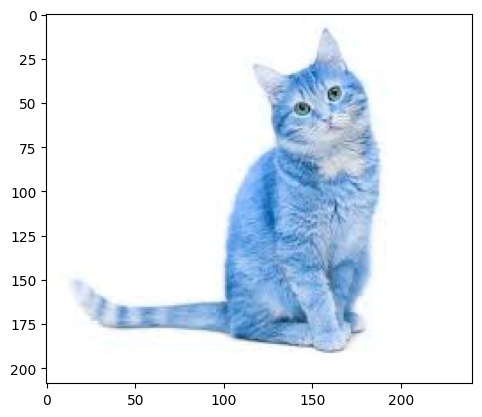

In [38]:
plt.imshow(img)

In [39]:
img.shape

(209, 241, 3)

In [40]:
img = cv2.resize(img,(256,256))

In [41]:
test_input = img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 [==============================] - 0s 252ms/step


array([[0.]], dtype=float32)

In [43]:
img1 = cv2.imread('/content/dog.jpeg')

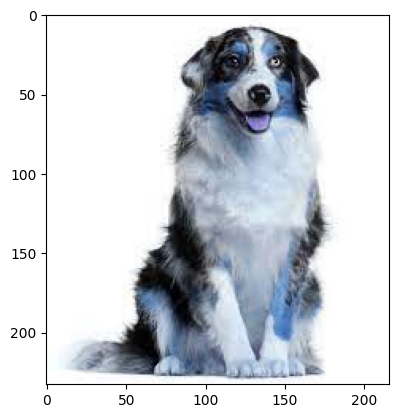

In [44]:
plt.imshow(img1)

In [45]:
img1 = cv2.resize(img1,(256,256))

In [46]:
test_input1 = img1.reshape((1,256,256,3))

In [57]:
model.predict(test_input1)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)